# FFT Phase Correlation
> How to use FFT Phase Correlation to find the relative translation between two images.

- toc: true 
- badges: true
- comments: true
- categories: [Computer Vision]
- image: images/2020-03-13-RQ-Decomposition-In-Practice/header.jpg

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import skimage.io
from skimage import filters
from skimage.color import rgb2gray
from skimage.filters import window, difference_of_gaussians

import scipy 

plt.rcParams['figure.figsize'] = [10, 10]

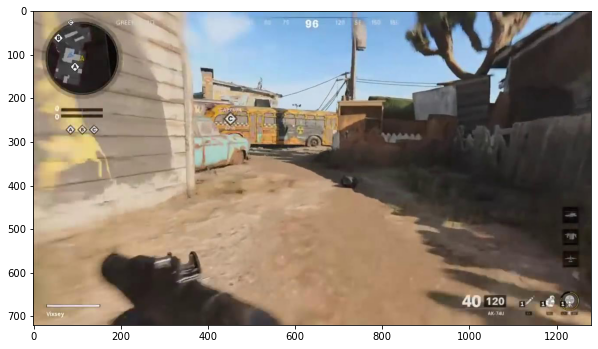

In [2]:
frame = skimage.io.imread('data/2020-12-19-FFT-Phase-Correlation/Frame.jpg')

plt.imshow(frame)
plt.show()

In [3]:
img1 = rgb2gray(frame[50:165,55:170,::-1])
plt.imshow(img1),cmap='gray')
plt.show()


shift_x = 10
shift_y = 20

#Shift the img1 10 pixels to the right and 20 pixels down.
result = scipy.ndimage.fourier_shift(np.fft.fft2(img1), shift=(shift_y,shift_x))
img2 = np.fft.ifft2(result).real

plt.imshow(np.hstack([img1,img2]),cmap='gray')
plt.show()


SyntaxError: unmatched ')' (<ipython-input-3-7c7cfae1358d>, line 2)

In [ ]:
# window images
img1_wimage = img1 * window('hann', img1.shape)
img2_wimage = img2 * window('hann', img2.shape)


plt.imshow(img1_wimage,cmap='gray')
plt.show()

# Compute the 2D FFT of each image
img1_fs = np.fft.fft2(img1_wimage)
img2_fs = np.fft.fft2(img2_wimage)


#Compute the corss power spectrum
cross_power_spectrum = (img1_fs*np.conjugate(img2_fs)) / np.abs(img1_fs*np.conjugate(img2_fs))

r = np.fft.ifft2(cross_power_spectrum).real

r = np.fft.fftshift(r)

plt.imshow(r)
plt.show()

In [ ]:
#Find the location of the peak
[py,px] = np.argwhere(r==r.max())[0]

cx,cy = 57,57
shift_x = cx - px
shift_y = cy - py

print(f'Shift inferred X:{shift_x},Y:{shift_y}')
    

[Wikipedia](https://en.wikipedia.org/wiki/Phase_correlation)
[SkImage](https://scikit-image.org/docs/stable/auto_examples/registration/plot_register_translation.html#sphx-glr-auto-examples-registration-plot-register-translation-py)